# Сглаживание временных рядов

Сглаживание временных рядов является важным инструментом в анализе данных для выявления трендов и паттернов, минимизации шума и улучшения общей интерпретируемости данных. Ниже представлен обзор нескольких распространенных методов сглаживания временных рядов.

## 1. Простое скользящее среднее (SMA)

Простое скользящее среднее представляет собой метод, при котором для каждого момента времени рассчитывается среднее значение с использованием фиксированного окна. Этот метод хорошо подходит для сглаживания шумов и выявления общего тренда.

#### Плюсы:
- Прост в реализации и понимании.
- Эффективен для сглаживания шумов и выделения общего тренда.

#### Минусы:
- Чувствителен к выбору размера окна, что может влиять на результаты сглаживания.
- Не учитывает динамику изменения данных.

## 2. Экспоненциальное сглаживание (EMA)

Экспоненциальное сглаживание присваивает различные веса наблюдениям в зависимости от их временной удаленности. Этот метод уделяет больше внимания последним наблюдениям, что делает его более чувствительным к изменениям в данных.

#### Плюсы:
- Более гибкий и адаптивный, чем SMA.
- Больший вес уделяется последним наблюдениям, что полезно при анализе быстро изменяющихся данных.

#### Минусы:
- Чувствителен к начальным условиям.
- Может недооценивать влияние долгосрочных трендов из-за большего веса последних данных.

## 3. Взвешенное скользящее среднее (WMA)

Взвешенное скользящее среднее присваивает различные веса каждому наблюдению в окне сглаживания. Этот метод полезен, когда некоторым наблюдениям следует придавать больший вес.

#### Плюсы:
- Позволяет задать различные веса разным наблюдениям, что полезно при наличии важных периодов в данных.

#### Минусы:
- Требует подбора оптимальных весов.
- Более сложен в реализации по сравнению с SMA.

## 4. Метод Хольта-Винтерса

Метод Хольта-Винтерса является более сложным методом, который учитывает как уровень, так и тренд в данных, а также сезонность. Этот метод особенно эффективен при работе с временными рядами, подчиняющимися сложным паттернам.

#### Плюсы:
- Учитывает уровень, тренд и сезонность в данных, что позволяет более точно моделировать сложные временные ряды.
- Хорошо справляется с долгосрочными трендами и сезонными колебаниями.

#### Минусы:
- Более сложен в реализации и требует оценки параметров.
- Чувствителен к начальным условиям и выбору параметров, что может потребовать экспертных знаний.


# Формулы:
### Простое скользящее среднее (SMA)

Простое скользящее среднее рассчитывается как среднее арифметическое значений в окне заданной ширины (`n` - размер окна).

$ SMA_t = \frac{1}{n} \sum_{i=t-n+1}^{t} Y_i $

Где:
- $ SMA_t $ - значение сглаженного ряда в момент времени $ t $.
- $ n $ - размер окна.

### Экспоненциальное сглаживание (EMA)

Экспоненциальное сглаживание рассчитывается с использованием взвешенного среднего, где текущее значение сглаженного ряда зависит от предыдущего значения сглаженного ряда и текущего наблюдения $ \alpha $ - коэффициент сглаживания).

$ EMA_t = \alpha \cdot Y_t + (1 - \alpha) \cdot EMA_{t-1} $

Где:
- $ EMA_t $ - значение сглаженного ряда в момент времени $ t $.
- $ \alpha $ - коэффициент сглаживания.
- $ Y_t $ - текущее значение временного ряда.

### Взвешенное скользящее среднее (WMA)

Взвешенное скользящее среднее рассчитывается как сумма произведений значений в окне на соответствующие веса ($ w_i $).

$ WMA_t = \sum_{i=t-n+1}^{t} w_i \cdot Y_i $

Где:
- $ WMA_t $ - значение взвешенного скользящего среднего в момент времени $ t $.
- $ w_i $ - вес, присвоенный $ i $-му наблюдению.
- $ n $ - размер окна.

### Метод Хольта-Винтерса

Метод Хольта-Винтерса включает три компонента: уровень ($ l_t $), тренд ($ b_t $), и сезонность ($s_t $). Обновление производится с учетом предыдущих значений и параметров сглаживания $( \alpha, \beta, \gamma )$.

$ l_t = \alpha \cdot (Y_t - s_{t-L}) + (1 - \alpha) \cdot (l_{t-1} + b_{t-1}) $

-
$ b_t = \beta \cdot (l_t - l_{t-1}) + (1 - \beta) \cdot b_{t-1} $

-
$ s_t = \gamma \cdot (Y_t - l_{t-1} - b_{t-1}) + (1 - \gamma) \cdot s_{t-L} $

-
$ \hat{Y}_{t+h} = l_t + h \cdot b_t + s_{t-L+h} $

Где:
- $ l_t $ - уровень в момент времени $ t $.
- $ b_t $ - тренд в момент времени $ t $.
- $ s_t $ - сезонность в момент времени $ t $.
- $ \hat{Y}_{t+h} $ - прогноз на $ h $ шагов вперед.
- $ L $ - длина сезонного периода.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [10]:
data = pd.read_csv('Datasets/AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [11]:
data = data.rename(columns={"#Passengers": "Passengers"}, inplace=False)
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [12]:
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Построим график временного ряда

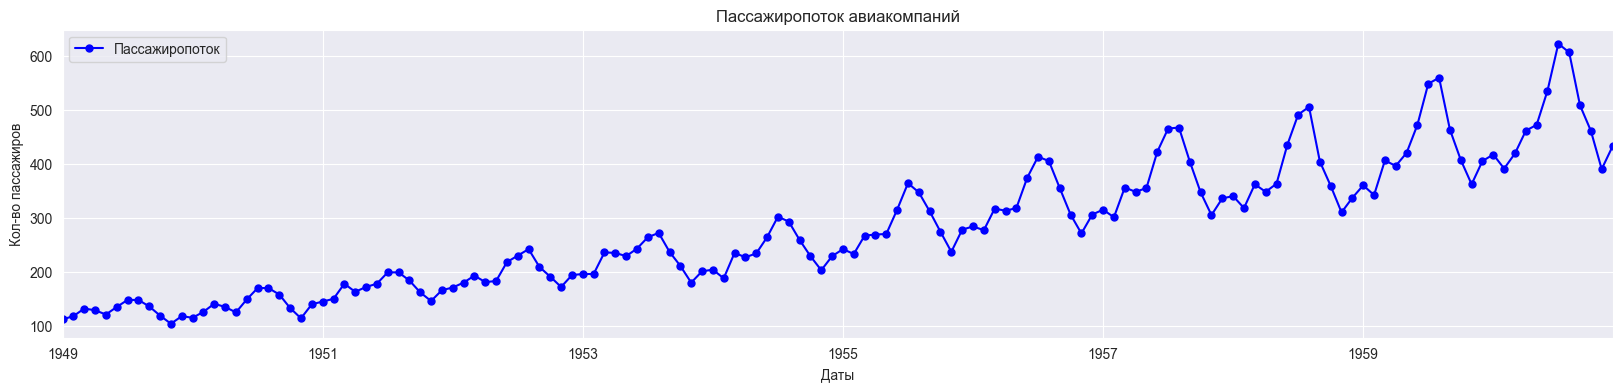

In [13]:
data.plot(y='Passengers', figsize=(20, 4), color='blue', linestyle='-', marker='o', markersize=5,
          label='Пассажиропоток')
plt.grid(True)
plt.legend(loc='best')
plt.title('Пассажиропоток авиакомпаний')
plt.xlabel('Даты')
plt.ylabel('Кол-во пассажиров')
plt.show(block=False)

## Построим гистограмму

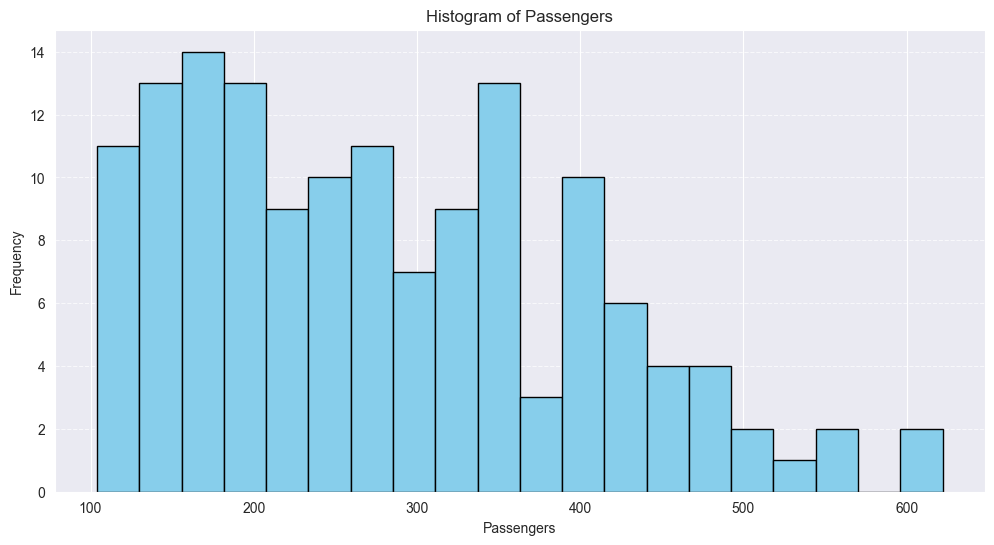

In [14]:
plt.figure(figsize=(12, 6))
plt.hist(data['Passengers'], bins=20, color='skyblue', edgecolor='black')

plt.title('Histogram of Passengers')
plt.xlabel('Passengers')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Разделим набор данных на обучающую и тестовую выборку

In [15]:
train_len = 120
train = data[:train_len]
test = data[train_len:]

# Методы экспоненциального сглаживания

## Простое экспоненциальное сглаживание

In [16]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train['Passengers'])
model_fit = model.fit(smoothing_level=0.2, optimized=False)
model_fit.params

C:\Users\Admin\PycharmProjects\100DaysOfDataScience\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [17]:
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

### Посмотрим результаты

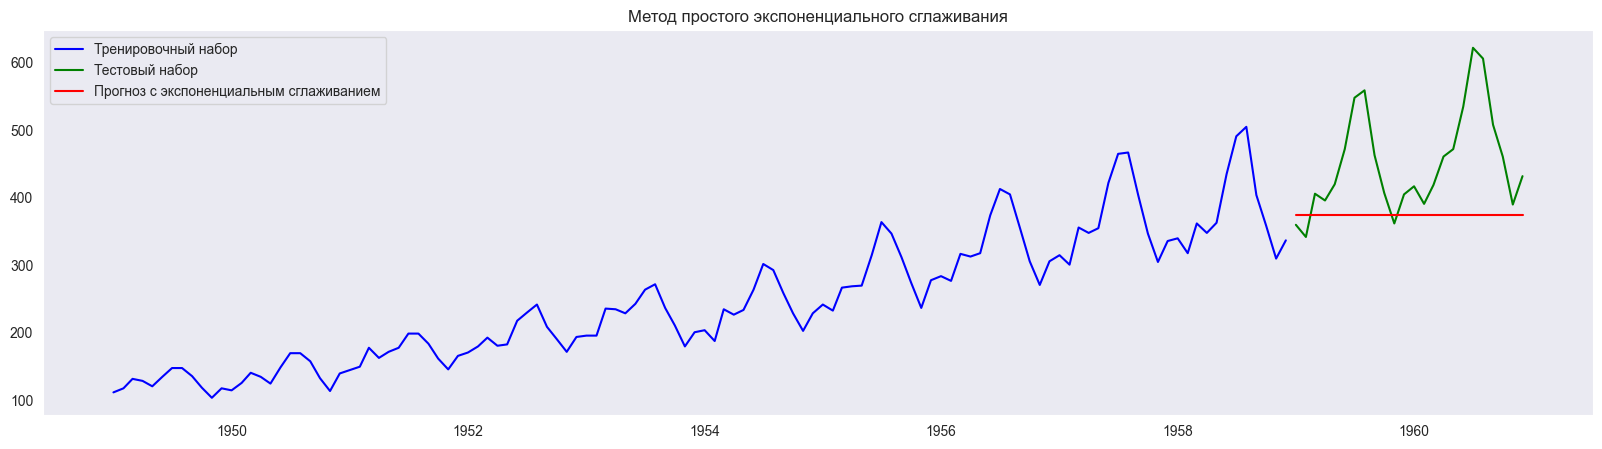

In [18]:
plt.figure(figsize=(20, 5))
plt.grid()
plt.plot(train['Passengers'], label='Тренировочный набор', color='blue')
plt.plot(test['Passengers'], label='Тестовый набор', color='green')
plt.plot(y_hat_ses['ses_forecast'], label='Прогноз с экспоненциальным сглаживанием', color='red')
plt.legend(loc='best')
plt.title('Метод простого экспоненциального сглаживания')
plt.show()

In [19]:
results = pd.DataFrame(columns=['Method', 'RMSE', 'MAPE'])

In [20]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers'] - y_hat_ses['ses_forecast']) / test['Passengers']) * 100, 2)

In [21]:
tempResults = pd.DataFrame({'Method': ['Simple exponential smoothing'], 'RMSE': [rmse], 'MAPE': [mape]})
results = pd.concat([results, tempResults])
results

C:\Users\Admin\AppData\Local\Temp\ipykernel_24900\1331222001.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, tempResults])


,Method,RMSE,MAPE
0,Simple exponential smoothing,107.52,16.43


## Метод Холта с учетом тренда

In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods=12, trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
model_fit.params

C:\Users\Admin\AppData\Local\Temp\ipykernel_24900\3027094009.py:4: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)


{'smoothing_level': 0.2,
 'smoothing_trend': 0.01,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 118.46666666666661,
 'initial_trend': 2.0606060606060677,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [23]:
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

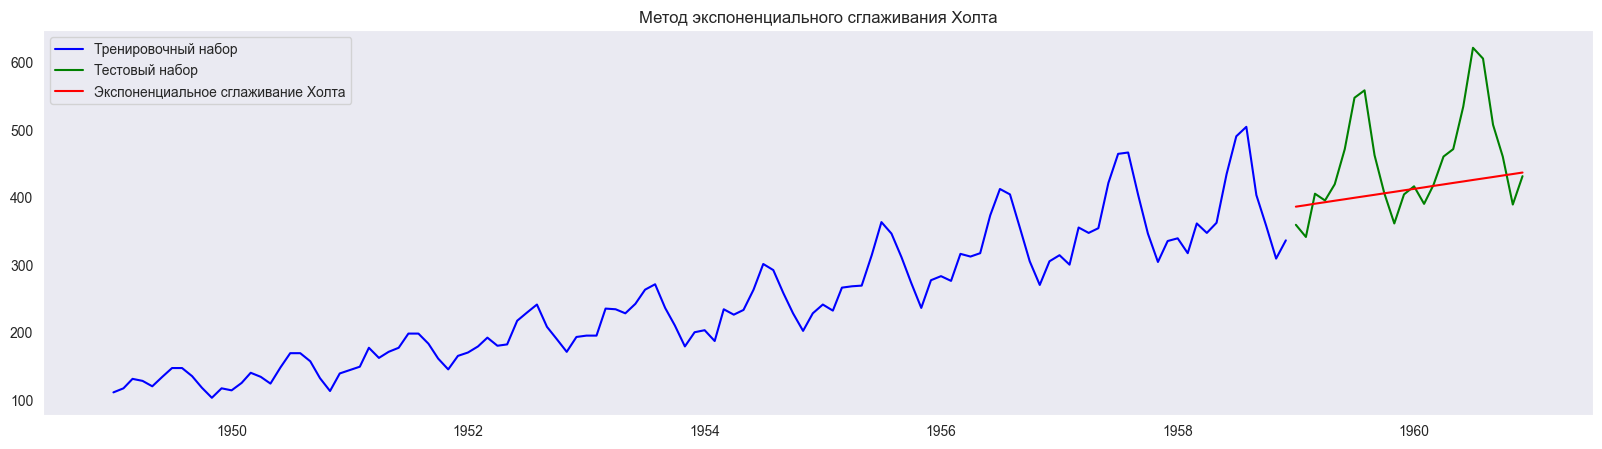

In [24]:
plt.figure(figsize=(20, 5))
plt.grid()
plt.plot(train['Passengers'], label='Тренировочный набор', color='blue')
plt.plot(test['Passengers'], label='Тестовый набор', color='green')
plt.plot(y_hat_holt['holt_forecast'], label='Экспоненциальное сглаживание Холта', color='red')
plt.legend(loc='best')
plt.title('Метод экспоненциального сглаживания Холта')
plt.show()

In [25]:
y_hat_holt.head()

,Passengers,holt_forecast
Month,,
1959-01-01,360,386.846352
1959-02-01,342,389.042211
1959-03-01,406,391.238071
1959-04-01,396,393.433931
1959-05-01,420,395.629791


In [26]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers'] - y_hat_holt['holt_forecast']) / test['Passengers']) * 100, 2)

In [27]:
tempResults = pd.DataFrame({'Method': ['Holt\'s exponential smoothing'], 'RMSE': [rmse], 'MAPE': [mape]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing,107.52,16.43
0,Holt's exponential smoothing,80.90,11.32


## Аддитивный метод Холта-Винтерса с учетом тренда и сезонности

In [28]:
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods=12, trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa = test.copy()
forecast_values = model_fit.forecast(len(test))
y_hat_hwa['hw_forecast'] = forecast_values

{'smoothing_level': 0.23678678235712566, 'smoothing_trend': 1.8055668382578714e-09, 'smoothing_seasonal': 0.7632132086415252, 'damping_trend': nan, 'initial_level': 119.1876680939318, 'initial_trend': 2.2768394955266533, 'initial_seasons': array([ -9.42424719,  -3.87104168,   8.69002781,   3.6678027 ,
        -4.94701962,   9.26652064,  21.53444859,  19.2001798 ,
         5.07181472, -13.80997707, -28.51179942, -12.37245268]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


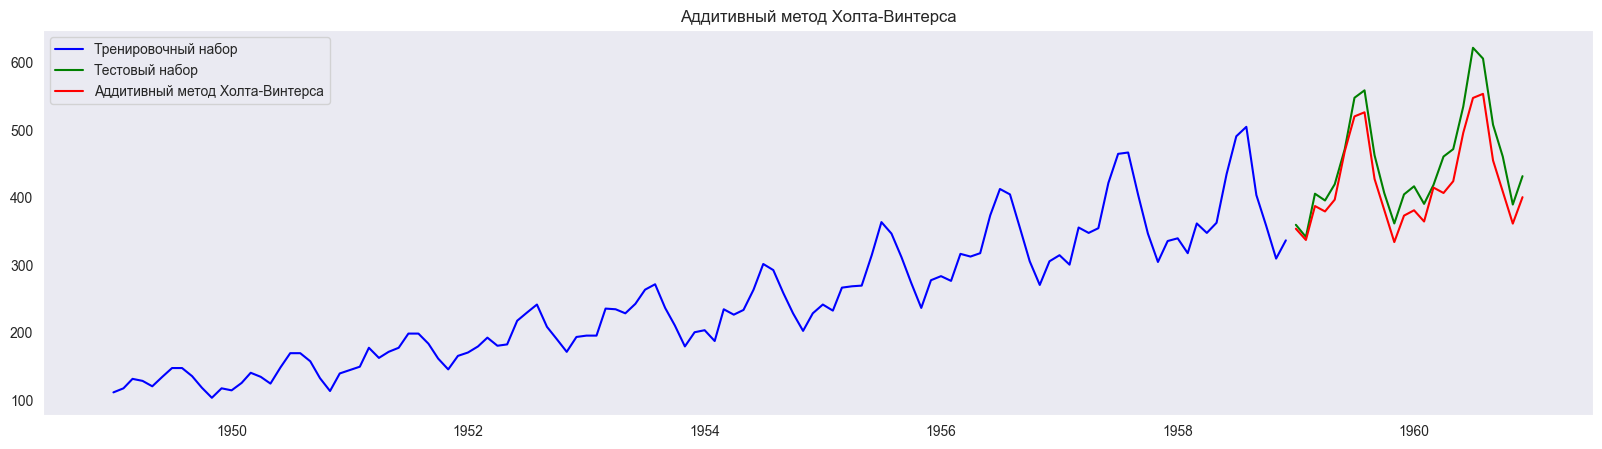

In [29]:
plt.figure(figsize=(20, 5))
plt.grid()
plt.plot(train['Passengers'], label='Тренировочный набор', color='blue')
plt.plot(test['Passengers'], label='Тестовый набор', color='green')
plt.plot(y_hat_hwa['hw_forecast'], label='Аддитивный метод Холта-Винтерса', color='red')
plt.legend(loc='best')
plt.title('Аддитивный метод Холта-Винтерса')
plt.show()

In [30]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers'] - y_hat_hwa['hw_forecast']) / test['Passengers']) * 100, 2)

In [31]:
tempResults = pd.DataFrame({'Method': ['Holt Winters\' additive method'], 'RMSE': [rmse], 'MAPE': [mape]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing,107.52,16.43
0,Holt's exponential smoothing,80.90,11.32
0,Holt Winters' additive method,35.76,6.64


## Мультипликативный метод Холта-Винтерса с учетом тренда и сезонности

In [32]:
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods=12, trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
model_fit.params

{'smoothing_level': 0.364208357460606,
 'smoothing_trend': 4.191162581733996e-09,
 'smoothing_seasonal': 0.6357916412612594,
 'damping_trend': nan,
 'initial_level': 110.89386078445895,
 'initial_trend': 2.389331198805944,
 'initial_seasons': array([0.98867675, 1.03912176, 1.14217091, 1.08689584, 1.00612809,
        1.10442233, 1.20431631, 1.18998306, 1.08561792, 0.94580897,
        0.84005265, 0.96819086]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [33]:
y_hat_hwm = test.copy()
forecast_values = model_fit.forecast(len(test))
y_hat_hwm['hw_forecast'] = forecast_values

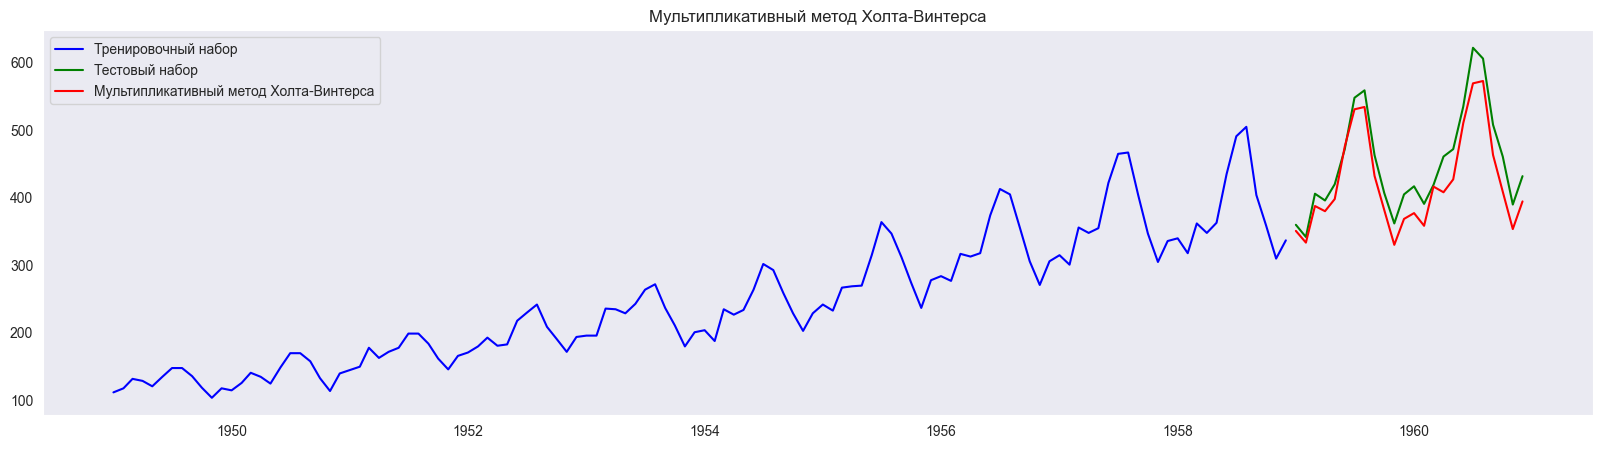

In [34]:
plt.figure(figsize=(20, 5))
plt.grid()
plt.plot(train['Passengers'], label='Тренировочный набор', color='blue')
plt.plot(test['Passengers'], label='Тестовый набор', color='green')
plt.plot(y_hat_hwm['hw_forecast'], label='Мультипликативный метод Холта-Винтерса', color='red')
plt.legend(loc='best')
plt.title('Мультипликативный метод Холта-Винтерса')
plt.show()

In [35]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers'] - y_hat_hwm['hw_forecast']) / test['Passengers']) * 100, 2)

In [36]:
tempResults = pd.DataFrame({'Method': ['Holt Winters\' multiplicative method'], 'RMSE': [rmse], 'MAPE': [mape]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing,107.52,16.43
0,Holt's exponential smoothing,80.90,11.32
0,Holt Winters' additive method,35.76,6.64
0,Holt Winters' multiplicative method,32.49,6.39


По результатам проведенной работы можем сделать вывод, что лучше использовать мультипликативный метод Холта-Винтерса для точного прогнозирования временных рядов, поскольку он имеет наименьший RMSE среди всех.